<IPython.core.display.Javascript object>


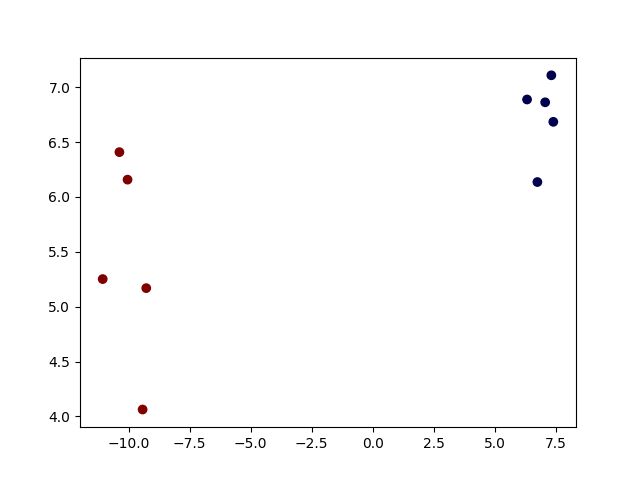

<IPython.core.display.Javascript object>


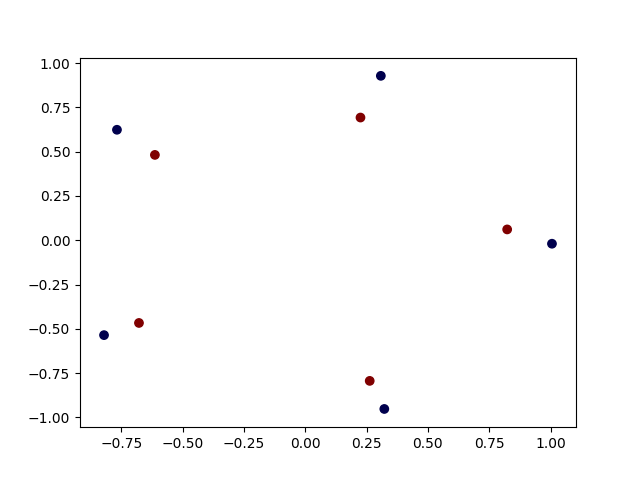

<IPython.core.display.Javascript object>


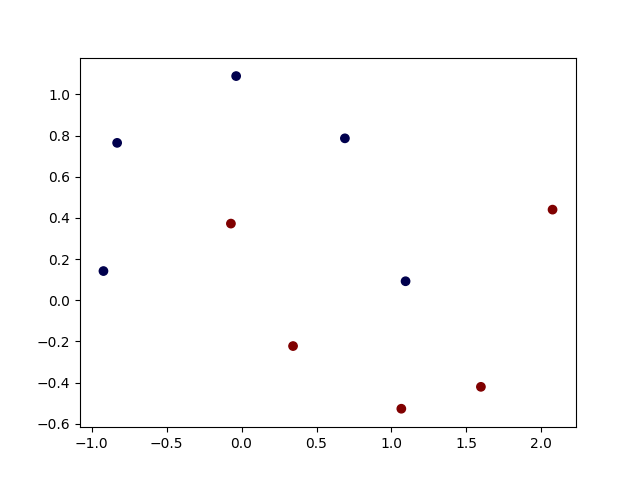

In [1]:
%matplotlib notebook

import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from matplotlib import colors, cm

def visualize(data, n_classes = 2, color = "seismic"):
    scaler = colors.Normalize(vmin=0, vmax=n_classes - 1)
    colormap = plt.get_cmap(color)
    mapper = cm.ScalarMappable(norm=scaler, cmap=colormap)

    for i, (inputs, outputs) in enumerate(data):
        title = "Dataset {}".format(i + 1)
        figure = plt.figure(title)
        plt.scatter(inputs[:, 0], inputs[:, 1], c=[mapper.to_rgba(output) for output in outputs])
    plt.plot()

def convert_dataset(inputs, outputs, training_split = 0.9):
    training = {}
    testing = {}
    
    labels = np.unique(outputs)
    for label in labels:
        data = inputs[np.where(outputs == label)]
        split = int(training_split * len(data))
        training[label] = data[:split]
        testing[label] = data[split:]
        
    return training, testing

NUM_SAMPLES = 10
data = [
    datasets.make_blobs(n_samples=NUM_SAMPLES, n_features=2, centers=2),
    datasets.make_circles(n_samples=NUM_SAMPLES, noise=0.03),
    datasets.make_moons(n_samples=NUM_SAMPLES, noise=0.08)
]

visualize(data)

In [2]:
from qiskit_aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit_aqua.input import get_input_instance
from qiskit_aqua import run_algorithm

params_two_class = {
    'problem': {'name': 'svm_classification', 'random_seed': 10598},
    'algorithm': {
        'name': 'QSVM.Kernel'
    },
    'backend': {'name': 'qasm_simulator', 'shots': 1024},
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entanglement': 'linear'}
}

for i, (inputs, outputs) in enumerate(data):
    training_input, testing_input = convert_dataset(inputs, outputs, 0.8)    
    
    algo_input = get_input_instance('SVMInput')
    algo_input.training_dataset  = training_input
    algo_input.test_dataset = testing_input
    
    result = run_algorithm(params_two_class, algo_input)
    print("Dataset {}: {}%".format(i + 1, result['testing_accuracy']))

Dataset 1: 0.5%
Dataset 2: 0.0%
Dataset 3: 0.0%
